<a href="https://colab.research.google.com/github/Pushkarp26/Markytics-case-study/blob/main/Markytics_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd

In [58]:
df = pd.read_csv("Case Study Data.csv")
df.head()

,Retailer Name,Brand1,Brand2,Brand3,Brand4,Brand5,Brand6,Brand7,Brand8,Brand9,Brand10,Brand11,Brand12,Total Sales,Number of Brands,Category of Retailer
0,Retailer 1,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,30826.61,0.0,0.0,30826.6100,1,NaN
1,Retailer 2,9833.1060,0.0,0.0,24073.632,33806.4312,0.0,0.0,0.0,0.000,0.00,0.0,0.0,67713.1692,3,NaN
2,Retailer 3,24690.6708,0.0,0.0,0.000,27367.0386,0.0,0.0,0.0,12948.696,0.00,0.0,0.0,65006.4054,3,NaN
3,Retailer 4,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0,NaN
4,Retailer 5,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0,NaN


In [59]:
df.shape

(9938, 16)

In [60]:
df.describe()

,Brand1,Brand2,Brand3,Brand4,Brand5,Brand6,Brand7,Brand8,Brand9,Brand10,Brand11,Brand12,Total Sales,Number of Brands,Category of Retailer
count,9938.000000,9938.000000,9938.000000,9938.000000,9.938000e+03,9938.000000,9.938000e+03,9938.000000,9938.000000,9938.000000,9938.000000,9938.000000,9.938000e+03,9938.000000,0.0
mean,1626.947684,157.941751,0.983022,2668.657468,2.892482e+03,1212.684379,1.184803e+03,620.551458,2486.111412,1613.797392,746.308459,98.945128,1.551269e+04,0.828738,NaN
std,7184.209516,2221.445456,97.997007,15436.354622,3.074098e+04,7430.711600,3.078367e+04,3354.461354,14747.601322,6084.118340,3746.600964,1135.016794,8.245152e+04,1.459062,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,NaN
75%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.830092e+04,1.000000,NaN
max,203217.524000,119687.289600,9769.274400,481472.640000,2.955616e+06,464839.948800,3.032761e+06,67149.830000,932306.112000,145207.771200,62038.236000,44554.456800,7.618235e+06,9.000000,NaN


In [61]:
import matplotlib.pyplot as plt

In [62]:
sliced1 = df.iloc[:,1:15]
sliced1.head()

,Brand1,Brand2,Brand3,Brand4,Brand5,Brand6,Brand7,Brand8,Brand9,Brand10,Brand11,Brand12,Total Sales,Number of Brands
0,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,30826.61,0.0,0.0,30826.6100,1
1,9833.1060,0.0,0.0,24073.632,33806.4312,0.0,0.0,0.0,0.000,0.00,0.0,0.0,67713.1692,3
2,24690.6708,0.0,0.0,0.000,27367.0386,0.0,0.0,0.0,12948.696,0.00,0.0,0.0,65006.4054,3
3,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0
4,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0


In [63]:
print(sliced1.shape)

(9938, 14)


{'boxes': [<matplotlib.lines.Line2D at 0x7fec5a6fda90>],
 'caps': [<matplotlib.lines.Line2D at 0x7fec5d280128>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fec5d2959b0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fec5d2950b8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fec5d22b7b8>,
  <matplotlib.lines.Line2D at 0x7fec5d280160>]}

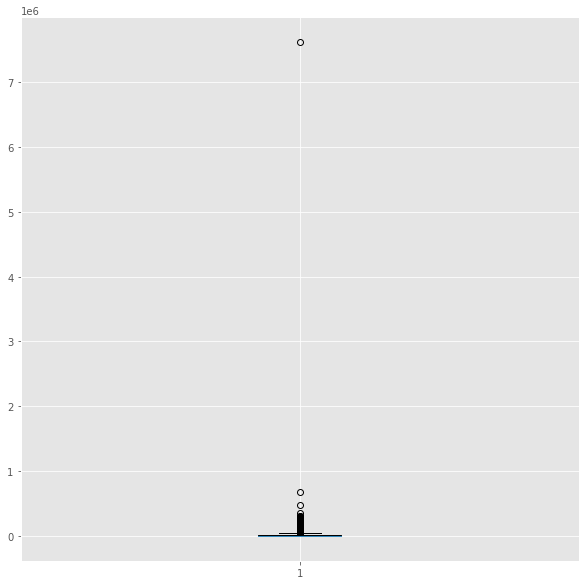

In [64]:
fig1 = plt.figure(figsize=(10,10))
plt.boxplot(sliced1["Total Sales"])

In [65]:
fig = plt.figure(figsize=(30, 30),dpi=500)      
plt.suptitle('Boxplot of all Features',fontsize=30,ha='center',
             va='bottom')

for i in range(1, sliced1.shape[1]):         
    plt.subplot(5,6 , i)               
    f = plt.gca()
    plt.boxplot(sliced1.iloc[:, i],whiskerprops={'color':'green','lw':1,'ls':'solid'})
    plt.xlabel(sliced1.columns[i],fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)                        
plt.tight_layout()

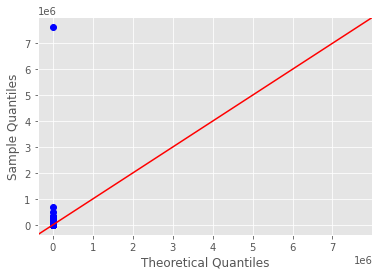

In [66]:
import numpy as np 
import statsmodels.api as sm 
import pylab as py 

sm.qqplot(sliced1['Total Sales'], line ='45') 
py.show() 

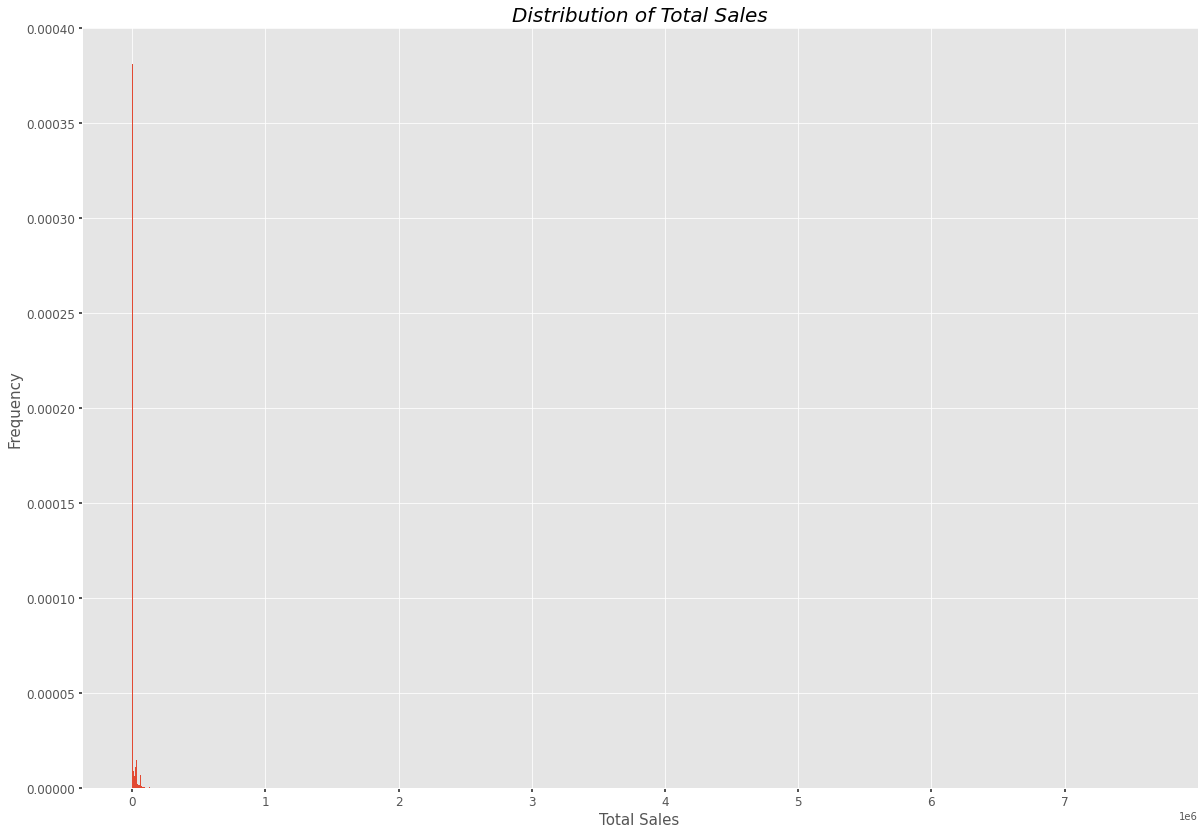

In [67]:
m = sliced1['Total Sales']
plt.style.use('ggplot')
plt.figure(figsize=(20,14))
n, bins, patches = plt.hist(x=m, bins='auto', alpha=1, density=True)
plt.title("Distribution of Total Sales",fontsize=20,
          style='italic')
plt.xlabel("Total Sales",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.tick_params('both',labelsize=12,pad=3,width=2,grid_color='white')

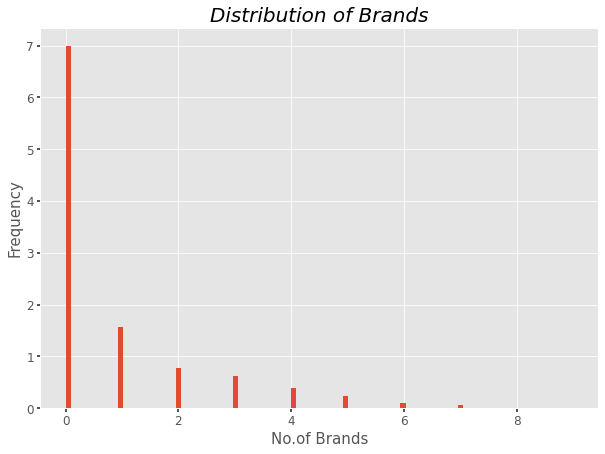

In [68]:
n = sliced1['Number of Brands']
plt.style.use('ggplot')
plt.figure(figsize=(10,7))
n, bins, patches = plt.hist(x=n, bins='auto', alpha=1, density=True)
plt.title("Distribution of Brands",fontsize=20,
          style='italic')
plt.xlabel("No.of Brands",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.tick_params('both',labelsize=12,pad=3,width=2,grid_color='white')

Preparing the data.

* Based on my rough analysis prior to this, there is an outlier in Total Sales which need to be removed.
Since it was leading to wrong predictions.
* Then assuming 2 instances 
1. Predictions based only on 12 brands(Brand 1 to Brand 12).
2. Predictions based only on Total Sales and Number of Brands.

####**1st instance**


In [69]:
df_new = df[df["Total Sales"]!=0]  # selecting the data where total sales is not equal to 0
max_total_sale = max(df_new['Total Sales'])  
df_new = df_new[df_new["Total Sales"]!=max_total_sale]   #removing the outlier since it will affect the working of algorithm
df_new = df_new.iloc[:,1:13]

df_new.head()

,Brand1,Brand2,Brand3,Brand4,Brand5,Brand6,Brand7,Brand8,Brand9,Brand10,Brand11,Brand12
0,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,30826.6100,0.0,0.0
1,9833.1060,0.0,0.0,24073.632,33806.4312,0.0,0.0,0.0,0.000,0.0000,0.0,0.0
2,24690.6708,0.0,0.0,0.000,27367.0386,0.0,0.0,0.0,12948.696,0.0000,0.0,0.0
6,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,25897.392,0.0000,0.0,0.0
9,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,31309.9064,0.0,0.0


In [70]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
scaled_df_new = pd.DataFrame(min_max.fit_transform(df_new),columns=df_new.columns)
scaled_df_new.describe()

,Brand1,Brand2,Brand3,Brand4,Brand5,Brand6,Brand7,Brand8,Brand9,Brand10,Brand11,Brand12
count,3488.000000,3488.000000,3488.000000,3488.000000,3488.000000,3488.000000,3488.000000,3488.000000,3488.000000,3488.000000,3488.000000,3488.000000
mean,0.022811,0.003760,0.000287,0.015764,0.039732,0.022830,0.027513,0.026330,0.032900,0.031665,0.034275,0.006327
std,0.056778,0.031185,0.016932,0.052586,0.067324,0.064667,0.085403,0.081617,0.089219,0.065969,0.098136,0.042701
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.024194,0.000000,0.000000,0.000000,0.070069,0.000000,0.000000,0.000000,0.062500,0.040850,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


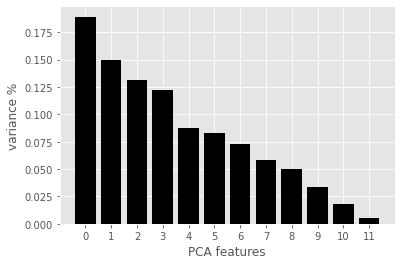

In [71]:
from sklearn.decomposition import PCA
pca = PCA(n_components=12)
principalComponents = pca.fit_transform(scaled_df_new)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

# Save components to a DataFrame
PCA_components_1 = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

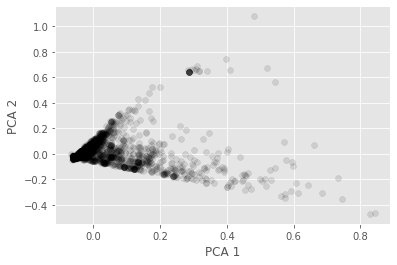

In [72]:
plt.scatter(PCA_components_1[0], PCA_components_1[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [73]:
#Modelling
from sklearn.cluster import KMeans
model_1 = KMeans(n_clusters=3,random_state=42)
model_1.fit(PCA_components_1)
labels_1 = model_1.labels_

In [74]:
np.bincount(labels_1)

array([ 322, 3142,   24])

In [75]:
labels_1

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [76]:
df_new.insert((df_new.shape[1]),'labels',labels_1)


In [77]:
df_new["Retailer Name"] = df["Retailer Name"]
df_new.head()

,Brand1,Brand2,Brand3,Brand4,Brand5,Brand6,Brand7,Brand8,Brand9,Brand10,Brand11,Brand12,labels,Retailer Name
0,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,30826.6100,0.0,0.0,1,Retailer 1
1,9833.1060,0.0,0.0,24073.632,33806.4312,0.0,0.0,0.0,0.000,0.0000,0.0,0.0,1,Retailer 2
2,24690.6708,0.0,0.0,0.000,27367.0386,0.0,0.0,0.0,12948.696,0.0000,0.0,0.0,1,Retailer 3
6,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,25897.392,0.0000,0.0,0.0,1,Retailer 7
9,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,31309.9064,0.0,0.0,1,Retailer 10


In [78]:
from google.colab import files

df_new.to_csv('df_new.csv')
files.download('df_new.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##**2nd instance**

In [79]:
df_01 = df[df["Total Sales"]!=0]
max_total_sale = max(df_01['Total Sales'])
df_01 = df_01[df_01["Total Sales"]!=max_total_sale]
df_01 = df_01.iloc[:,13:15]

df_01.head()

,Total Sales,Number of Brands
0,30826.6100,1
1,67713.1692,3
2,65006.4054,3
6,25897.3920,1
9,31309.9064,1


In [80]:
min_max = MinMaxScaler()
scaled_df_01 = pd.DataFrame(min_max.fit_transform(df_01),columns=df_01.columns)
scaled_df_01.describe()

,Total Sales,Number of Brands
count,3488.000000,3488.000000
mean,0.060979,0.169976
std,0.060180,0.195522
min,0.000000,0.000000
25%,0.021622,0.000000
50%,0.044676,0.125000
75%,0.081974,0.250000
max,1.000000,1.000000


Here as such there were only 2 dimensions I didn't felt a need to perform PCA as above.

In [81]:
model_2 = KMeans(n_clusters=3,random_state=42)
model_2.fit(scaled_df_01)

labels_2 = model_2.labels_
labels_2

array([0, 2, 2, ..., 0, 2, 0], dtype=int32)

In [82]:
np.bincount(labels_2)

array([2161,  386,  941])

In [86]:
final_df = df.iloc[:,0:15]
final_df = df[df["Total Sales"]!=0]
max_total_sale = max(final_df['Total Sales'])
final_df = final_df[final_df["Total Sales"]!=max_total_sale]
final_df.insert((final_df.shape[1]),'Category Of Retailer',labels_2)
final_df.head()

,Retailer Name,Brand1,Brand2,Brand3,Brand4,Brand5,Brand6,Brand7,Brand8,Brand9,Brand10,Brand11,Brand12,Total Sales,Number of Brands,Category of Retailer,Category Of Retailer
0,Retailer 1,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,30826.6100,0.0,0.0,30826.6100,1,NaN,0
1,Retailer 2,9833.1060,0.0,0.0,24073.632,33806.4312,0.0,0.0,0.0,0.000,0.0000,0.0,0.0,67713.1692,3,NaN,2
2,Retailer 3,24690.6708,0.0,0.0,0.000,27367.0386,0.0,0.0,0.0,12948.696,0.0000,0.0,0.0,65006.4054,3,NaN,2
6,Retailer 7,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,25897.392,0.0000,0.0,0.0,25897.3920,1,NaN,0
9,Retailer 10,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,31309.9064,0.0,0.0,31309.9064,1,NaN,0


In [84]:
df.iloc[:,0:15]

,Retailer Name,Brand1,Brand2,Brand3,Brand4,Brand5,Brand6,Brand7,Brand8,Brand9,Brand10,Brand11,Brand12,Total Sales,Number of Brands
0,Retailer 1,0.0000,0.0,0.0,0.000,0.0000,0.000,0.0,0.0,0.000,30826.61,0.0,0.0,30826.6100,1
1,Retailer 2,9833.1060,0.0,0.0,24073.632,33806.4312,0.000,0.0,0.0,0.000,0.00,0.0,0.0,67713.1692,3
2,Retailer 3,24690.6708,0.0,0.0,0.000,27367.0386,0.000,0.0,0.0,12948.696,0.00,0.0,0.0,65006.4054,3
3,Retailer 4,0.0000,0.0,0.0,0.000,0.0000,0.000,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0
4,Retailer 5,0.0000,0.0,0.0,0.000,0.0000,0.000,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9933,Retailer 9934,0.0000,0.0,0.0,0.000,0.0000,0.000,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0
9934,Retailer 9935,0.0000,0.0,0.0,0.000,0.0000,0.000,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0
9935,Retailer 9936,0.0000,0.0,0.0,0.000,0.0000,0.000,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0
9936,Retailer 9937,0.0000,0.0,0.0,24073.632,0.0000,24250.942,0.0,0.0,0.000,0.00,0.0,0.0,48324.5740,2


In [87]:
final_df.to_csv('final_df.csv')
files.download('final_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>